In [1]:
from PIL import Image
import cv2
import os
import torchvision.transforms as transforms
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import glob

In [5]:
filename = 'data/OCL/20/normal/20_0.jpg'
img = cv2.imread(filename)[:,:,[2,1,0]]
print(img.shape)

(1040, 1920, 3)


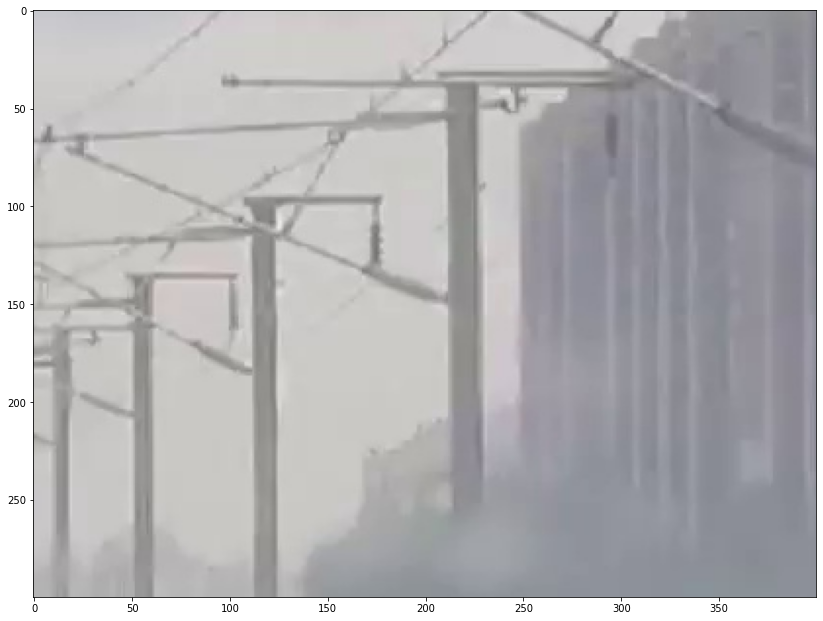

In [271]:
# img = Image.open('hsr/1/normal/3_194.jpg')
dis = cv2.imread('hsr/3/normal/3_35.jpg')[:,:,[2,1,0]]
dis = dis[100:400,1300:1700]
plt.figure(figsize=(19.2,10.8))
plt.imshow(dis)
plt.show()

In [92]:
print(src[320,130])

[255 255 255]


In [9]:
def imgs2video(imgs_dir, save_name, fps):
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    video_writer = cv2.VideoWriter(save_name, fourcc, fps, (1920, 1080))
    # no glob, need number-index increasing
    imgs = glob.glob(os.path.join(imgs_dir, '*.jpg'))
    imgs.sort()
    
    for i in range(len(imgs)):
#         imgname = os.path.join(imgs_dir, 'core-{:02d}.jpg'.format(i))
        imgname = imgs[i]
        frame = cv2.imread(imgname)
        video_writer.write(frame)

    video_writer.release()
def video2imgs(i_video, o_video, num):
    cap = cv2.VideoCapture(i_video)
    num_frame = cap.get(cv2.CAP_PROP_FRAME_COUNT)
    expand_name = '.jpg'
    if not cap.isOpened():
        print("Please check the path.")
    cnt = 0
    count = 0
    while 1:
        ret, frame = cap.read()
        cnt += 1
        #  how many frame to cut
        if not ret:
            break
        if cnt % num == 0:
            count += 1
            cv2.imwrite(os.path.join(o_video, str(count) + expand_name), frame)

In [10]:
imgs2video('hsr/1/normal', 'video.mp4', 12)
video2imgs('video.mp4','v2i',1)